# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [45]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/customer_booking.csv'

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
bookings = pd.read_csv("customer_booking.csv", encoding = "ISO-8859-1")

bookings.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


booking_complete     0     1
flight_day                  
Fri               5778   983
Mon               6898  1204
Sat               4951   861
Sun               5627   927
Thu               6302  1122
Tue               6544  1129
Wed               6422  1252


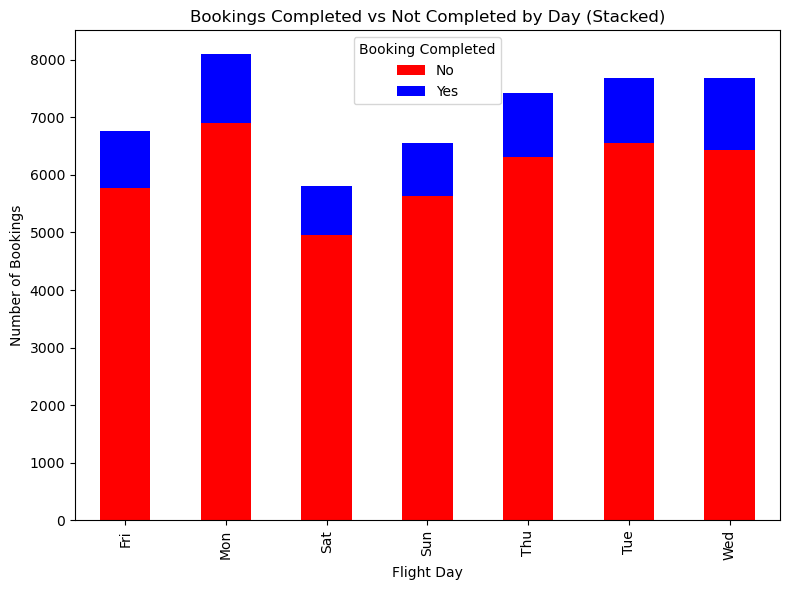

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the frequency table
day_counts = pd.crosstab(bookings['flight_day'], bookings['booking_complete'])

print(day_counts)

# Plot as stacked bar chart
day_counts.plot(kind='bar', stacked=True, figsize=(8,6), color=['red', 'blue'])

plt.xlabel('Flight Day')
plt.ylabel('Number of Bookings')
plt.title('Bookings Completed vs Not Completed by Day (Stacked)')
plt.legend(title='Booking Completed', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

<Axes: xlabel='purchase_lead', ylabel='Count'>

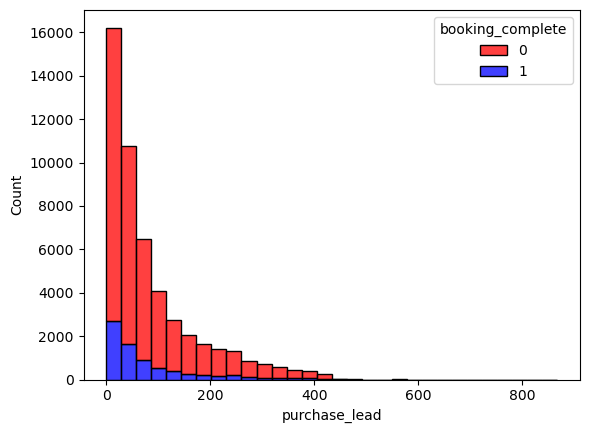

In [73]:
sns.histplot(data=bookings, x='purchase_lead', hue='booking_complete', bins=30, palette=['red', 'blue'], multiple='stack')

<Axes: xlabel='flight_hour', ylabel='Count'>

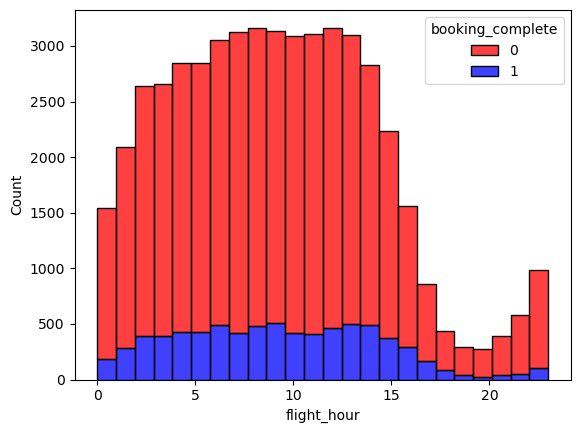

In [89]:
sns.histplot(data=bookings, x='flight_hour', hue='booking_complete', bins=24, palette=['red', 'blue'], multiple='stack')

## Prepping dataset for machine learning model:

In [96]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

bookings["flight_day"] = bookings["flight_day"].map(mapping)

bookings.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [110]:
bookings_encoded = pd.get_dummies(bookings, columns=[
    'sales_channel', 
    'trip_type', 
    'route', 
    'booking_origin'])

In [116]:
bookings_encoded.head()

len(bookings_encoded.columns)

918

In [144]:
from sklearn.model_selection import train_test_split

X = bookings_encoded.drop('booking_complete', axis=1)
y = bookings_encoded['booking_complete'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf.score(X_test, y_test)

0.8507

In [158]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
}

# RandomizedSearchCV will randomly sample from this distribution
random_search = RandomizedSearchCV(rf, param_dist, n_iter=10, cv=3, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Get the best model
best_rf = random_search.best_estimator_

# Predict on the test data
y_pred = best_rf.predict(X_test)

# Evaluate the model
print(best_rf.score(X_test, y_test))

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None}
0.8514


In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8498
           1       0.53      0.11      0.18      1502

    accuracy                           0.85     10000
   macro avg       0.69      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000



In [212]:
from sklearn.model_selection import train_test_split

X = bookings_encoded.drop('booking_complete', axis=1)
y = bookings_encoded['booking_complete'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size = 0.2)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators = 300,
    min_samples_split = 5,
    max_depth = None,
    criterion = 'entropy')

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

rf.score(X_test, y_test)

0.8518

In [214]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8498
           1       0.53      0.11      0.19      1502

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.55     10000
weighted avg       0.81      0.85      0.81     10000



In [288]:
from sklearn.model_selection import cross_val_score

# Apply cross-validation (5-fold)
cv_scores = cross_val_score(rf, X, y, cv=5)  # rf is the Random Forest model

print("Cross-validation scores:", cv_scores)
print("Mean score:", cv_scores.mean())

Cross-validation scores: [0.8503 0.7761 0.7287 0.5298 0.7688]
Mean score: 0.7307400000000001


In [286]:
features = pd.DataFrame(rf.feature_importances_, index = X.columns)
features = features.sort_values(by=0, ascending=False)

features = features[0:11]

names_list = features.index.tolist()
importance_list = features[0].tolist()

from IPython.display import display

display(names_list)
display(importance_list)

['purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'flight_duration',
 'num_passengers',
 'booking_origin_Australia',
 'booking_origin_Malaysia',
 'wants_in_flight_meals',
 'wants_extra_baggage',
 'wants_preferred_seat']

[0.12071313495154168,
 0.09699191640428911,
 0.09673090029881255,
 0.06792167075070603,
 0.04101171870508677,
 0.0387895840779566,
 0.03868940911593667,
 0.0338087581722607,
 0.018267311049529982,
 0.016768085100483186,
 0.015943030709339417]

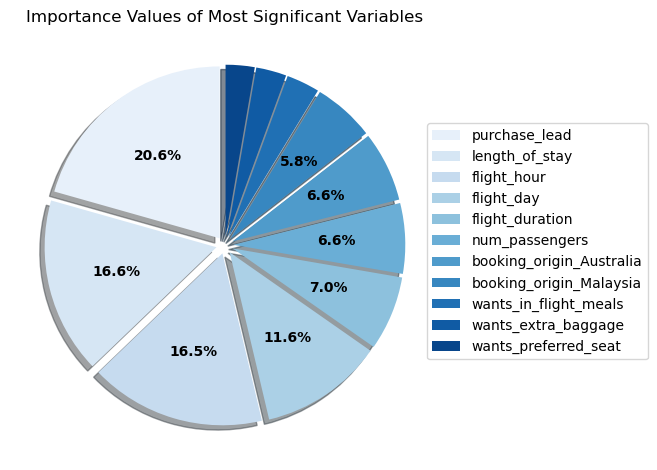

In [300]:
def autopct_filter(pct):
    return f'{pct:.1f}%' if pct >= 5 else ''

#establish the labels and color for each slice of the pie chart
labels = names_list
colors = colors = sns.color_palette("Blues", len(importance_list))

#create and customize the pie chart
plt.pie(importance_list, colors = colors, shadow = True, explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],
        autopct=autopct_filter, textprops={'color': 'black', 'weight': 'bold'}, startangle = 90)

#customize the rest of the figure
plt.title('Importance Values of Most Significant Variables')
plt.legend(labels, bbox_to_anchor=(1.5, 0.8), loc='upper right')
plt.tight_layout()
plt.show() 